## Analyzing the Telecom Churn
- Identify the factors that are leading to churn
- Identify markets, customers that are facing higher churns
- Is there any correlation between various parameters with churn

In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# uploading the churn dataset
df1=pd.read_excel('Telecom Dataset.xlsx')

In [40]:
# reviewing the dataset
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [42]:
# Is there any null values in the dataset?
df1.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### The dataset has details of 3333 customers 
#### There are no null values in the dataset

### churn distribution

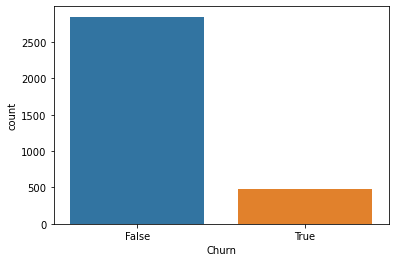

Churn rate out of 3333 customers is:  State                     14.491449
Account length            14.491449
Area code                 14.491449
International plan        14.491449
Voice mail plan           14.491449
Number vmail messages     14.491449
Total day minutes         14.491449
Total day calls           14.491449
Total day charge          14.491449
Total eve minutes         14.491449
Total eve calls           14.491449
Total eve charge          14.491449
Total night minutes       14.491449
Total night calls         14.491449
Total night charge        14.491449
Total intl minutes        14.491449
Total intl calls          14.491449
Total intl charge         14.491449
Customer service calls    14.491449
Churn                     14.491449
dtype: float64


In [43]:
sns.countplot(x='Churn', data=df1)
plt.show()

churn_percent=(df1.loc[df1['Churn']==True].count())/(len(df1['Churn']))*100
print("Churn rate out of 3333 customers is: ",churn_percent)

#### the churn rate at overall level is 14.5%

### State wise churn rate

In [44]:
df_state = (df1['Churn'] == True).groupby(df1['State']).agg(lambda x: x.sum() / len(x)).reset_index(name='Churn Rate')
df_state.sort_values(by='Churn Rate', ascending=False, inplace=True)
df_state.head()

,State,Churn Rate
31,NJ,0.264706
4,CA,0.264706
43,TX,0.250000
20,MD,0.242857
40,SC,0.233333


In [45]:
df_state.tail()

,State,Churn Rate
12,IA,0.068182
45,VA,0.064935
3,AZ,0.062500
0,AK,0.057692
11,HI,0.056604


#### against the overall churn rate of 14.5%, States like NJ, CA, TX, MD and SC have more than 23% churn rate
#### States like IA, VA, AZ, AK and HI have less than 6% churn rate

## Area wise churn rate

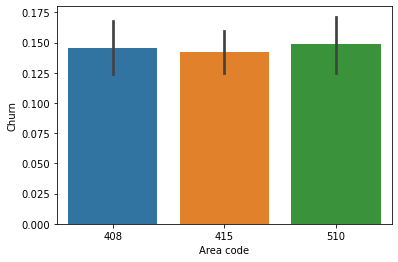

In [46]:
sns.barplot(x='Area code', y='Churn', data=df1)
plt.show()

In [47]:
df_area = (df1['Churn'] == True).groupby(df1['Area code']).agg(lambda x: x.sum() / len(x)).reset_index(name='Churn Rate')
df_area

,Area code,Churn Rate
0,408,0.145585
1,415,0.142598
2,510,0.148810


#### Churn count and churn rate are similar across the three Areas. 
#### So, there is no pattern in Area wise churn.

### Account length

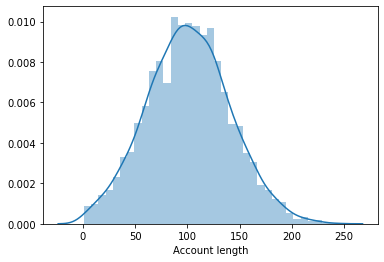

In [48]:
sns.distplot(df1['Account length'])
plt.show()

In [49]:
df1['Account length'].mean()

101.06480648064806

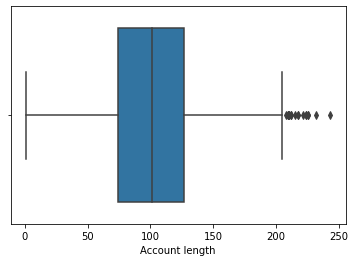

In [50]:
sns.boxplot(x='Account length', data=df1)
plt.show()

#### Account length has a nearly normal distribution around the mean value of 101
#### There are some outliers in Account length at the higher level

### Treating the outliers under Account length

In [51]:
# calculating IQR for Accout length
Q1=df1['Account length'].quantile(0.25)
Q3=df1['Account length'].quantile(0.75)
print("Q1: ",Q1)
print("Q3: ",Q3)
IQR=Q3-Q1

Q1:  74.0
Q3:  127.0


In [52]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print("upper limit for Account length: ",upper_limit)
print("lower limit for Account length: ",lower_limit)

upper limit for Account length:  206.5
lower limit for Account length:  -5.5


In [53]:
# how many records of Account length are in the outliers
df1.loc[df1['Account length']>206.5]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
197,TX,208,510,No,No,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True
238,WY,215,510,No,No,0,83.6,148,14.21,120.9,91,10.28,226.6,110,10.20,10.7,9,2.89,0,False
309,SD,209,415,No,No,0,227.2,128,38.62,258.4,92,21.96,183.5,74,8.26,8.9,4,2.40,3,False
416,DE,224,510,Yes,No,0,171.5,99,29.16,160.0,103,13.60,212.4,102,9.56,5.0,2,1.35,1,True
817,UT,243,510,No,No,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,False
1045,TX,217,408,No,No,0,176.4,115,29.99,158.8,128,13.50,306.6,107,13.80,9.3,3,2.51,4,False
1093,VA,210,408,No,No,0,104.6,121,17.78,149.5,71,12.71,255.1,67,11.48,6.5,8,1.76,2,False
1387,CT,212,415,No,No,0,126.0,96,21.42,144.3,80,12.27,302.8,102,13.63,7.6,3,2.05,1,False
1408,NM,232,408,No,No,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,False
1551,MI,225,415,No,No,0,165.4,106,28.12,273.7,109,23.26,210.0,93,9.45,8.7,3,2.35,0,True


In [54]:
# replacing the outlier values
df1.loc[df1['Account length']>upper_limit, 'Account length']=206.5
df1.loc[df1['Account length']<lower_limit, 'Account length']=0

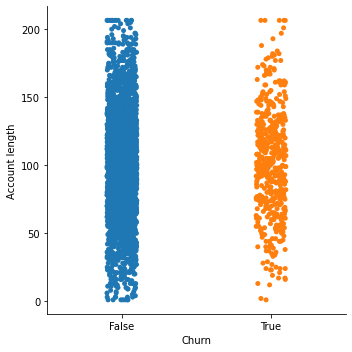

In [55]:
sns.catplot(x='Churn', y='Account length', data=df1)
plt.show()

#### From the above chart, it is clear that Account length is not a deterministic factor for Churn

### International Plan

In [56]:
df_international = (df1['Churn'] == True).groupby(df1['International plan']).agg(lambda x: x.sum() / len(x)).reset_index(name='Churn Rate')
df_international

,International plan,Churn Rate
0,No,0.114950
1,Yes,0.424149


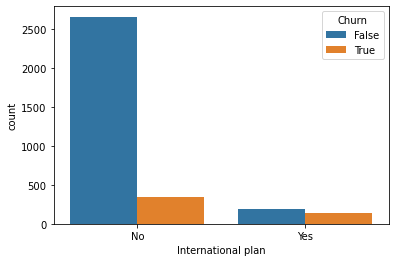

In [57]:
sns.countplot(x='International plan', hue='Churn', data=df1)
plt.show()

#### Customers having International plan are seeing higher churn (42% churn, vs. 11% for the other customers)

### Voicemail Plan    

In [58]:
df_voicemail = (df1['Churn'] == True).groupby(df1['Voice mail plan']).agg(lambda x: x.sum() / len(x)).reset_index(name='Churn Rate')
df_voicemail

,Voice mail plan,Churn Rate
0,No,0.167151
1,Yes,0.086768


#### Customers having voice mail plan are less likely to churn out

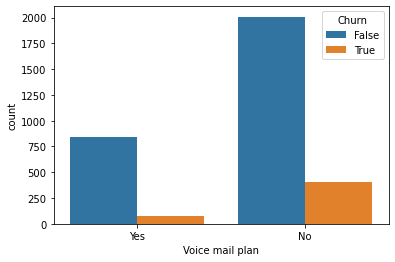

In [83]:
sns.countplot(x='Voice mail plan', hue='Churn', data=df1)
plt.show()

### Vmail messages

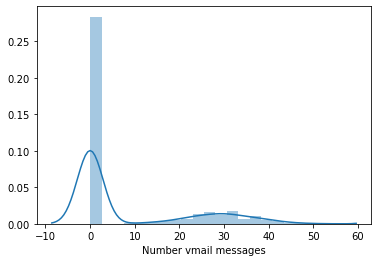

In [59]:
sns.distplot(df1['Number vmail messages'])
plt.show()

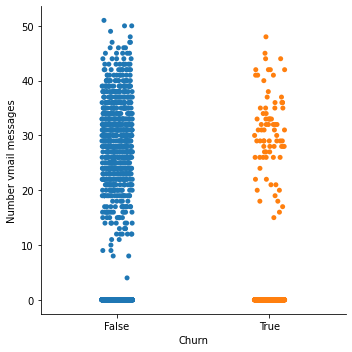

In [60]:
sns.catplot(x='Churn', y='Number vmail messages', data=df1)
plt.show()

#### Most of the customers do not use vmail messages much
#### Vmail message usage do not seem to be a deterministic factor for churn

### Total day minutes

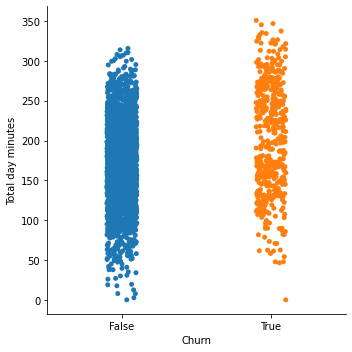

In [61]:
sns.catplot(x='Churn', y='Total day minutes', data=df1)
plt.show()

### Total day calls

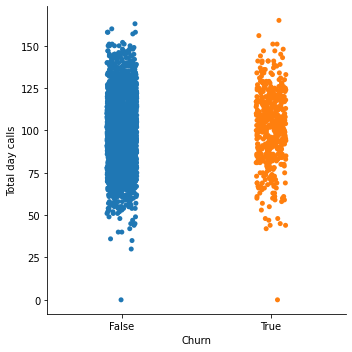

In [62]:
sns.catplot(x='Churn', y='Total day calls', data=df1)
plt.show()

### Total day charge

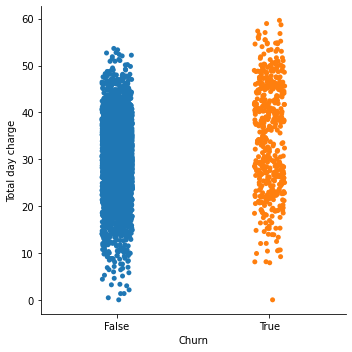

In [63]:
sns.catplot(x='Churn', y='Total day charge', data=df1)
plt.show()

#### Customers using more day minutes, and having to pay higher day charges, are seeing higher churn

### Total eve minutes

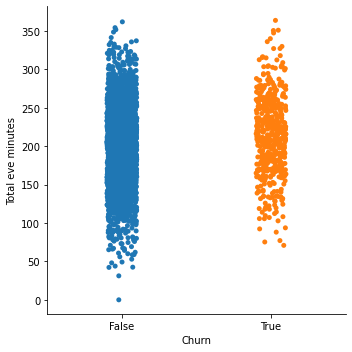

In [64]:
sns.catplot(x='Churn', y='Total eve minutes', data=df1)
plt.show()

### Total eve calls

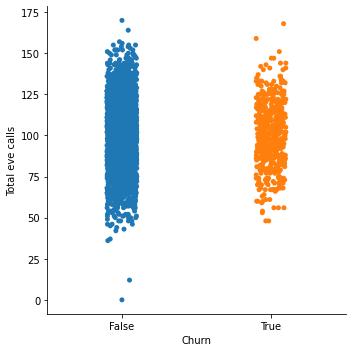

In [65]:
sns.catplot(x='Churn', y='Total eve calls', data=df1)
plt.show()

### Total eve charge

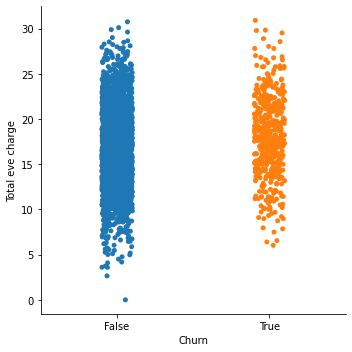

In [66]:
sns.catplot(x='Churn', y='Total eve charge', data=df1)
plt.show()

### Total night minutes

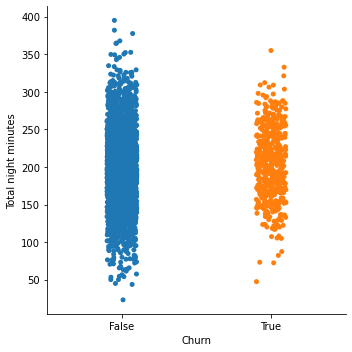

In [67]:
sns.catplot(x='Churn', y='Total night minutes', data=df1)
plt.show()

### Total night calls

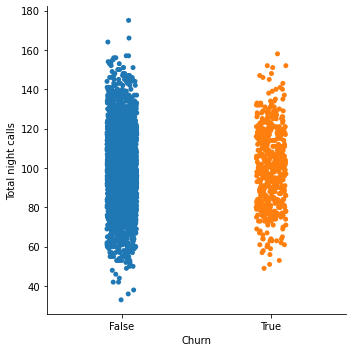

In [68]:
sns.catplot(x='Churn', y='Total night calls', data=df1)
plt.show()

### Total night charge

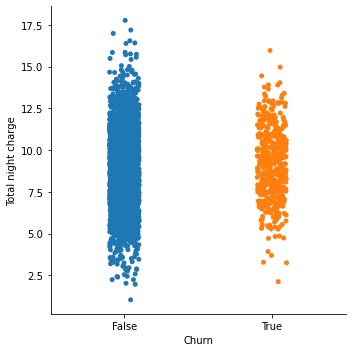

In [69]:
sns.catplot(x='Churn', y='Total night charge', data=df1)
plt.show()

### Total intl minutes

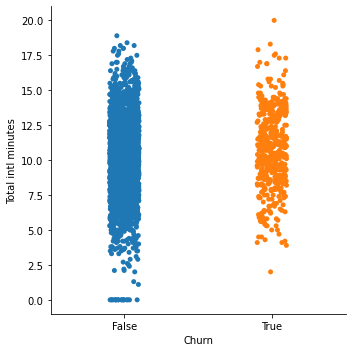

In [72]:
sns.catplot(x='Churn', y='Total intl minutes', data=df1)
plt.show()

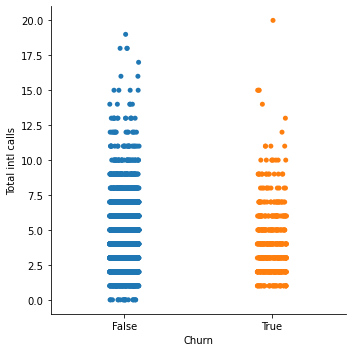

In [73]:
sns.catplot(x='Churn', y='Total intl calls', data=df1)
plt.show()

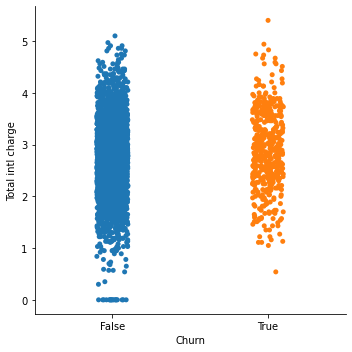

In [74]:
sns.catplot(x='Churn', y='Total intl charge', data=df1)
plt.show()

In [87]:
day_rate=(df1['Total day charge'].sum())/(df1['Total day minutes'].sum())
eve_rate=(df1['Total eve charge'].sum())/(df1['Total eve minutes'].sum())
night_rate=(df1['Total night charge'].sum())/(df1['Total night minutes'].sum())

print("Day rate: ", day_rate)
print("Evening rate: ", eve_rate)
print("Night rate: ", night_rate)

Day rate:  0.17000300739130672
Evening rate:  0.0850010487148578
Night rate:  0.04500041448440008


In [88]:
day_rate1=(df1['Total day charge'].sum())/(df1['Total day calls'].sum())
eve_rate1=(df1['Total eve charge'].sum())/(df1['Total eve calls'].sum())
night_rate1=(df1['Total night charge'].sum())/(df1['Total night calls'].sum())

print("Day rate: ", day_rate1)
print("Evening rate: ", eve_rate1)
print("Night rate: ", night_rate1)

Day rate:  0.3042974201797152
Evening rate:  0.17064034212316553
Night rate:  0.09029599081697182


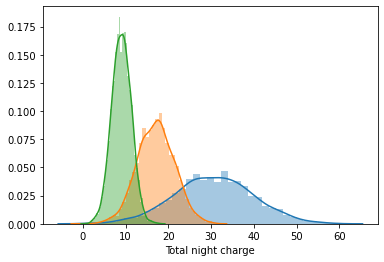

Mean day charge:  30.562307230723093
Mean eve charge:  17.083540354035392
Mean night charge:  9.039324932493264


In [95]:
sns.distplot(df1['Total day charge'])
sns.distplot(df1['Total eve charge'])
sns.distplot(df1['Total night charge'])

plt.show()

print("Mean day charge: ",df1['Total day charge'].mean())
print("Mean eve charge: ",df1['Total eve charge'].mean())
print("Mean night charge: ",df1['Total night charge'].mean())

In [105]:
import re
state1=df1.loc[df1['State'].str.contains('NJ|CA|TX|MD|SC', regex=True)]
state2=df1.loc[df1['State'].str.contains('IA|VA|AZ|AK|HI', regex=True)]
print("Mean day charge for higher churn states: ", state1['Total day charge'].mean())
print("Mean day charge for lower churn states: ", state2['Total day charge'].mean())

Mean day charge for higher churn states:  31.56588815789475
Mean day charge for lower churn states:  29.924655172413804


#### From the above charts, it is clear that people using more day minutes are churning more
#### This could be due to higher day charge rate, compared to evening or night charges

### Customer service calls

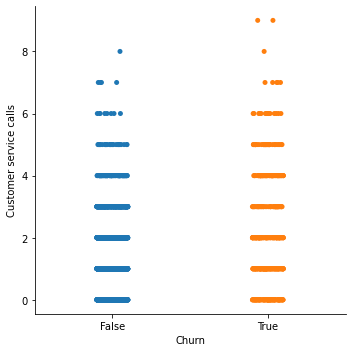

In [76]:
sns.catplot(x='Churn', y='Customer service calls', data=df1)
plt.show()

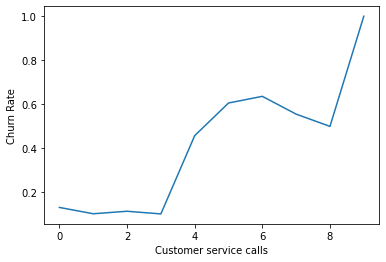

In [80]:
df_custservice = (df1['Churn'] == True).groupby(df1['Customer service calls']).agg(lambda x: x.sum() / len(x)).reset_index(name='Churn Rate')
sns.lineplot(x='Customer service calls', y='Churn Rate', data=df_custservice)
plt.show()

#### More the customer service calls, higher is the churn rate
#### So, if a customer calls more than 3 times, it is likely that she is going to leave

### Inference
- NJ, CA, TX, MD and SC states are seeing higher churn
- Customers opting for International plans are not happy with the service
- Customers using voice mail plan are happy with the service, but not many customers are using it
- Customers using more day minutes also see higher churn
- If a customer calls more than three times to the service centre, it is more likely that she would leave

### Action Plans
- Improve the International plans
- Incentivise more customers to use voice mail plan
- Make the day charges more competitive, particularly, in the states of NJ, CA, TX, MD and SC
- Incentivise a customer who has placed three service calls, to make him stay with the same service provider